In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [92]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [93]:
df = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [94]:
print(breast_cancer_dataset)
df['label']=breast_cancer_dataset.target
df.shape
df.info()
df.isnull().sum()
df.describe()
df['label'].value_counts()
df.groupby('label').mean()


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]], shape=(569, 30)), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [95]:
X=df.drop(['label'],axis=1)
Y= df['label']
X_train,Y_train,X_test,Y_test = train_test_split(X,Y, test_size=0.2,random_state=42)
print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)


X_train: (455, 30)
Y_train: (114, 30)


In [96]:
mask = ~np.isnan(X).any(axis=1)
X = X[mask]
Y = Y[mask]


In [97]:
import tensorflow as tf
tf.random.set_seed(3)

In [98]:
from tensorflow import keras

In [99]:
# model=keras.Sequential([keras.layers.Flatten(input_shape=(30,)),
#                         keras.layers.Dense(20,activation='relu'),
#                         keras.layers.Dense(2,activation='sigmoid')])

In [100]:
# # Compiling the Neural Network
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
#   ### for integer output(label encoding(0,1,2 in DL we use sparse categorical cross entropy,for one hot encoding in DL we use Categorical entropy

In [101]:
print("X_train type:", type(X_train))
print("Y_train type:", type(Y_train))

print("X_train shape:", np.shape(X_train))
print("Y_train shape:", np.shape(Y_train))
print("Length of X_train:", len(X_train))
print("Length of Y_train:", len(Y_train))


X_train type: <class 'pandas.core.frame.DataFrame'>
Y_train type: <class 'pandas.core.frame.DataFrame'>
X_train shape: (455, 30)
Y_train shape: (114, 30)
Length of X_train: 455
Length of Y_train: 114


In [102]:
X_train, X_test = train_test_split(X, test_size=0.2)
Y_train, Y_test = train_test_split(Y, test_size=0.2)


In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, shuffle=True
)


In [104]:
##Standardize the Data

from sklearn.preprocessing import StandardScaler

In [105]:
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

In [106]:
print(X_train_std)
print(X_test_std)

[[-1.44075296 -0.43531947 -1.36208497 ...  0.9320124   2.09724217
   1.88645014]
 [ 1.97409619  1.73302577  2.09167167 ...  2.6989469   1.89116053
   2.49783848]
 [-1.39998202 -1.24962228 -1.34520926 ... -0.97023893  0.59760192
   0.0578942 ]
 ...
 [ 0.04880192 -0.55500086 -0.06512547 ... -1.23903365 -0.70863864
  -1.27145475]
 [-0.03896885  0.10207345 -0.03137406 ...  1.05001236  0.43432185
   1.21336207]
 [-0.54860557  0.31327591 -0.60350155 ... -0.61102866 -0.3345212
  -0.84628745]]
[[-0.46649743 -0.13728933 -0.44421138 ... -0.19435087  0.17275669
   0.20372995]
 [ 1.36536344  0.49866473  1.30551088 ...  0.99177862 -0.561211
  -1.00838949]
 [ 0.38006578  0.06921974  0.40410139 ...  0.57035018 -0.10783139
  -0.20629287]
 ...
 [-0.73547237 -0.99852603 -0.74138839 ... -0.27741059 -0.3820785
  -0.32408328]
 [ 0.02898271  2.0334026   0.0274851  ... -0.49027026 -1.60905688
  -0.33137507]
 [ 1.87216885  2.80077153  1.80354992 ...  0.7925579  -0.05868885
  -0.09467243]]


In [107]:
print(X_train.shape, Y_train.shape)


(455, 30) (455,)


In [108]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(30,)),
                        keras.layers.Dense(20,activation='relu'),
                        keras.layers.Dense(2,activation='sigmoid')])

c:\Users\priya\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [109]:
# Compiling the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [111]:
# training the neural network
history = model.fit(X_train_std,Y_train,validation_split=0.1, epochs=10)  # epoch = how many time the data has to go through itself (run 10 times)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8337 - loss: 0.4659 - val_accuracy: 0.8696 - val_loss: 0.3522
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8949 - loss: 0.3014 - val_accuracy: 0.8696 - val_loss: 0.2442
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9291 - loss: 0.2296 - val_accuracy: 0.8696 - val_loss: 0.2019
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9340 - loss: 0.1894 - val_accuracy: 0.9130 - val_loss: 0.1790
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9487 - loss: 0.1622 - val_accuracy: 0.9130 - val_loss: 0.1642
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9560 - loss: 0.1430 - val_accuracy: 0.9130 - val_loss: 0.1531
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9658 - loss: 0.1286 - val_accuracy: 0.9130 - val_loss: 0.1443
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9633 - loss: 0.1174 - val_accuracy: 0.9130 - v

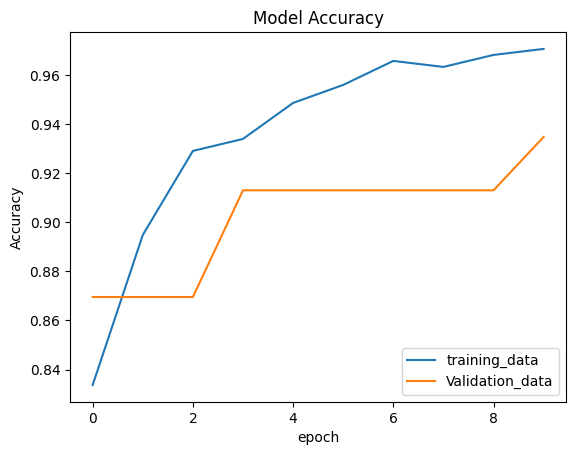

In [115]:
##Visualising the Accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['training_data','Validation_data'],loc="lower right")

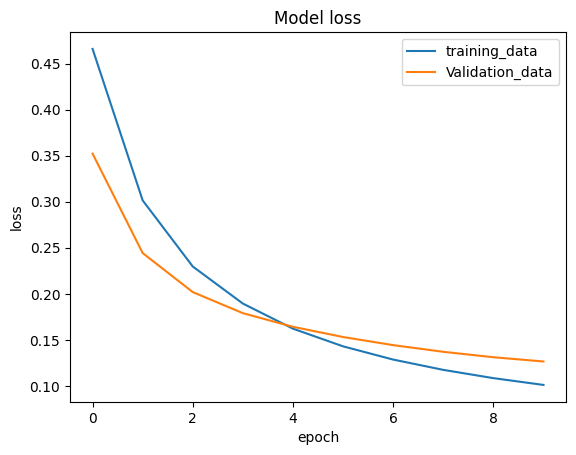

In [116]:
##Visualising the Accuracy and loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training_data','Validation_data'],loc="upper right")

In [117]:
##Accuracy model on the test data
loss,accuracy= model.evaluate(X_test_std,Y_test)
print(accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9737 - loss: 0.0992
0.9736841917037964


In [120]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.46649743 -0.13728933 -0.44421138 -0.48646498  0.28085007  0.04160589
 -0.11146496 -0.26486866  0.41524141  0.13513744 -0.02091509 -0.29323907
 -0.17460869 -0.2072995  -0.01181432 -0.35108921 -0.1810535  -0.24238831
 -0.33731758 -0.0842133  -0.2632354  -0.14784208 -0.33154752 -0.35109337
  0.48001942 -0.09649594 -0.03583041 -0.19435087  0.17275669  0.20372995]


In [121]:
Y_pred=model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step


In [122]:
print(Y_pred.shape)
print(Y_pred[0])

(114, 2)
[0.30707324 0.7767975 ]


In [ ]:
## here 30% chances of being 0 class and 77% of being 1 class

In [123]:
print(X_test_std)

[[-0.46649743 -0.13728933 -0.44421138 ... -0.19435087  0.17275669
   0.20372995]
 [ 1.36536344  0.49866473  1.30551088 ...  0.99177862 -0.561211
  -1.00838949]
 [ 0.38006578  0.06921974  0.40410139 ...  0.57035018 -0.10783139
  -0.20629287]
 ...
 [-0.73547237 -0.99852603 -0.74138839 ... -0.27741059 -0.3820785
  -0.32408328]
 [ 0.02898271  2.0334026   0.0274851  ... -0.49027026 -1.60905688
  -0.33137507]
 [ 1.87216885  2.80077153  1.80354992 ...  0.7925579  -0.05868885
  -0.09467243]]


In [124]:
print(Y_pred)

[[0.30707324 0.7767975 ]
 [0.9445486  0.42652032]
 [0.8468926  0.18875436]
 [0.17860559 0.9294625 ]
 [0.15810381 0.9622666 ]
 [0.99586433 0.01002416]
 [0.99680203 0.10952041]
 [0.8113812  0.4687424 ]
 [0.7069682  0.409347  ]
 [0.09940124 0.92708534]
 [0.15640855 0.5851172 ]
 [0.77802306 0.43722513]
 [0.17412746 0.7444892 ]
 [0.770532   0.63401484]
 [0.14837961 0.9273206 ]
 [0.9133619  0.3762818 ]
 [0.15914507 0.95517796]
 [0.02674311 0.9794475 ]
 [0.00992133 0.99708486]
 [0.9849151  0.16545366]
 [0.4440026  0.7068959 ]
 [0.18931288 0.7988605 ]
 [0.9955403  0.03042364]
 [0.02151287 0.9620088 ]
 [0.02811581 0.8414272 ]
 [0.46399447 0.951771  ]
 [0.17712745 0.93522704]
 [0.05793962 0.8243356 ]
 [0.13617702 0.89849776]
 [0.84621024 0.04162642]
 [0.04535028 0.88271075]
 [0.09018783 0.9694872 ]
 [0.03086799 0.97792447]
 [0.15560707 0.9254241 ]
 [0.03706866 0.9817859 ]
 [0.06500328 0.96607333]
 [0.30989367 0.32722995]
 [0.04776749 0.9674891 ]
 [0.87091523 0.18827106]
 [0.19295822 0.6855161 ]


In [ ]:
## here Those 2 class gives the probablity of 0 and 1 classes. if first 0.30 is leass than 0.77 then it belongs to class 1

In [ ]:
## model.predict() gives the prediction probablity of each class for that data point

In [129]:
## converting the predicition probabality to class labels
#Argmax function
my_list=[10,20,30]
a=np.argmax(my_list)
print(my_list)
print(a)
# here index of highest value 30 is 2

[10, 20, 30]
2


In [130]:
my_list=[0.25,0.56]
a=np.argmax(my_list)
print(my_list)
print(a)

[0.25, 0.56]
1


In [132]:
y_pred_labels=[np.argmax(i) for i in Y_pred]
print(y_pred_labels)

[np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1)

In [133]:
##building the predictive system

In [141]:
input_data=(17.99,
10.38,
122.8,
1001,
0.1184,
0.2776,
0.3001,
0.1471,
0.2419,
0.07871,
1.095,
0.9053,
8.589,
153.4,
0.006399,
0.04904,
0.05373,
0.01587,
0.03003,
0.006193,
25.38,
17.33,
184.6,
2019,
0.1622,
0.6656,
0.7119,
0.2654,
0.4601,
0.2654
)
#change the input data into numpy array
input_data_as_numpy_array=np.asarray(input_data)
##reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
##standarizing the input data
input_data_std=scaler.transform(input_data_reshaped)
prediction = model.predict(input_data_std)
print(prediction)
predicition_label=[np.argmax(prediction)]
print(predicition_label)
if predicition_label[0]==0:
    print("The Tumor is Malignant")
else:
    print("The tumor is Benign")

c:\Users\priya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
[[0.97498006 0.00773585]]
[np.int64(0)]
The Tumor is Malignant


In [142]:
input_data=(13.54,
14.36,
87.46,
566.3,
0.09779,
0.08129,
0.06664,
0.04781,
0.1885,
0.05766,
0.2699,
0.7886,
2.058,
23.56,
0.008462,
0.0146,
0.02387,
0.01315,
0.0198,
0.0023,
15.11,
19.26,
99.7,
711.2,
0.144,
0.1773,
0.239,
0.1288,
0.2977,
0.07259
)
#change the input data into numpy array
input_data_as_numpy_array=np.asarray(input_data)
##reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
##standarizing the input data
input_data_std=scaler.transform(input_data_reshaped)
prediction = model.predict(input_data_std)
print(prediction)
predicition_label=[np.argmax(prediction)]
print(predicition_label)
if predicition_label[0]==0:
    print("The Tumor is Malignant")
else:
    print("The tumor is Benign")

c:\Users\priya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
[[0.35971388 0.8166537 ]]
[np.int64(1)]
The tumor is Benign
